데이터 및 코드: https://github.com/datascienceabe/study_open/tree/master/Linear_Regression

참고:Rencher, A. C., & Schaalje, G. B. (2008). Linear models in statistics. John Wiley & Sons.

2장<br>
목차<br>
1. Regression through origin
2. Hypothesis Testing
3. $R^2$
4. Regressor가 확률 변수 일 때
5. 회귀 분석시 주의 사항

# 1. Regression Through Origin

In [5]:
df<-read.csv('./Shelf_Stocking.csv')
colnames(df)<-c('Time','Case')

# 1. Vector

Definition 2.2) Vector space<br>
$u_{1},...,u_{n}$이 vector space $V$의 element라고 할 때, 이 것의 linear combination으로 만들 수 있는 모든 경우의 합집합을 linear span of $u_{1},...,u_{n}$라고 함 <br>
=>$L(u_{1},...,u_{n})$

Definition 2.3) Column space<br>
matrix $U$의 column들로 span 되는 공간 <br>
=>$C(U)$

Definition 2.5) Basis<br>
$V=L(u_{1},...,u_{n})$할 수 있는 $u_{1},...,u_{n}$<br>
ex) $R^3$의 basis<br>
(1,0,0),(0,1,0),(0,0,1) or (1,1,0),(0,1,0),(0,0,1) 

Definition 2.6) Dot product<br>
$u \cdot v=<u,v>=\sum u_{i}v_{i}$<br>
$||u||=\sqrt{<u,u>}$=>length of a vector $u$

<b>Orthogonal Projection</b>

Definition 2.9) Othogonal Projection<br>
다음을 만족하면 vector $y$가 vector $x$에 orthogonal projection 했다고 함<br>
1) $\hat{y}=bx$ for some constant b<br>
2) $(y-\hat{y})\perp x$<br>
이때 $\hat{y}=p(y|x) $은 orthogonal projection

Orthogonal Projection 구하기<br>

$\hat{y}  = bx $  from (1)<br>
$y^{T}x-\hat{y}^{T}x  = 0$  from (2)<br>
$y^{T}x  =\hat{y}^{T}x $<br>
$\hat{y}^{T}x=(bx)^{T}x=bx^{T}x=b||x||^{2} $<br>
$b||x||^{2}=y^{T}x \Rightarrow b=\frac{y^{T}x}{||x||^{2}}$

Definition 2.10) Orthonormal basis<br>
$U$는 $R^{n}$의 subspace라고 할 때 $e_{1},...,e_{m}$이 다음의 조건을 만족하면 $U$에 대한 orthonormal basis라고 함<br>
1) $e_{1},...,e_{m}$은 $U$의 basis<br>
2) $e_{i} \cdot e_{j}=0$ for all $i \neq j$<br>
3) $||e_{i}||=1$ for all $i$

Orthonormalization 찾는 방법<br>
Theorm 2.11) Gram-Schmidt orthonormalization procedure<br>
$U$가 $R^{n}$의 subspace이고 $v_{1},..,v_{m}$이 $U$의 basis라고 할 때 orthnormal basis는 다음과 같음<br>
\begin{align}
e_{1}=\frac{u_{1}}{||u_{1}||}, & where &u_{1}=v_{1}\\
e_{2}=\frac{u_{2}}{||u_{2}||}, & where &u_{2}=v_{2}-p(v_{2}|u_{1})\\
e_{m}=\frac{u_{m}}{||u_{m}||}, & where &u_{m}=v_{m}-\sum_{i=1}^{m-1} p(v_{m}|u_{i})
\end{align}

Definition 2.12) Orthgonal Complement<br>
$U$는 $R^{n}$의 subspace라고 할 때 $U$의 orthogonal complement는 $u \cdot v =0$이 되는 모든 벡터 $v$로 구성 된 $R^{n}$의 subspace<br>
=>$U^{\perp}$

# 2. Matrix

<b>Trace</b><br>
A,B가 square matrix일 때<br>
1) tr(AB)=tr(BA)<br>
2) tr(A+B)=tr(A)+tr(B)

<b>Determinant</b><br>
A,B가 square matrix일 때<br>
1) det(AB)=det(A)det(B)<br>
2) det($A^{T}$)=det(A)

<b>Rank</b>

Definition 2.18) Rank<br>
Linearly independent한 Column 혹은 row의 수

1) r(A)=r($A^{T}$)<br>
2) r(A)=r($AA^{T}$)=r($A^{T}A$)<br>
3) r($A \perp B$)=r(A)r(B)

Definition 2.19) Rank의 특징<br>
A는 $(nxp)$ 행렬에 rank가 $r$<br>
1) $r=n<p$ 이면 A는 Full row rank를 가짐<br>
2) $r=n>p$ 이면 A는 Full column rank를 가짐<br>
3) $r=n=p$ 이면 A는 nonsingular

# 3. Projection Matrix

Definition 2.20) Orthogonal Projection Matrix<br>
P는 다음 조건을 만족하면 V로의 projection matrix<br>
1) $v \in V$ 면 $Pv=v$ (projection)<br>
2) $w \perp V$ 면 $Pw=0$ (orthogonality)<br>

Theorem 2.21) P는 $C(P) \subset R^{n}$로의 projection matrix iff<br>
1) $PP=P$ (idempotent)<br>
2) $P=P^{T}$ (symmetric)

Theorem 2.22) Projection Matrices are unique

Theorem 2.23) $V_{1},...,V_{k}$가 $R^{n}$의 서로 간의 orthogonal인 subspace면서 linear independent 하면 <br>
모든 $y \in R^{n}$에 대해 $p(y|V)=\sum _{i=1}^{k}p(y|V_{i})$

Theorem 2.24) $u_{1},...,u_{k}$가 $V \in R^{n}$의 orthonormal basis이고 $U=(u_{1},...,u_{k})$면 <br>
$UU^{T}$는 $V$로의 projection matrix

<b>Projection Matrix with Regression</b>

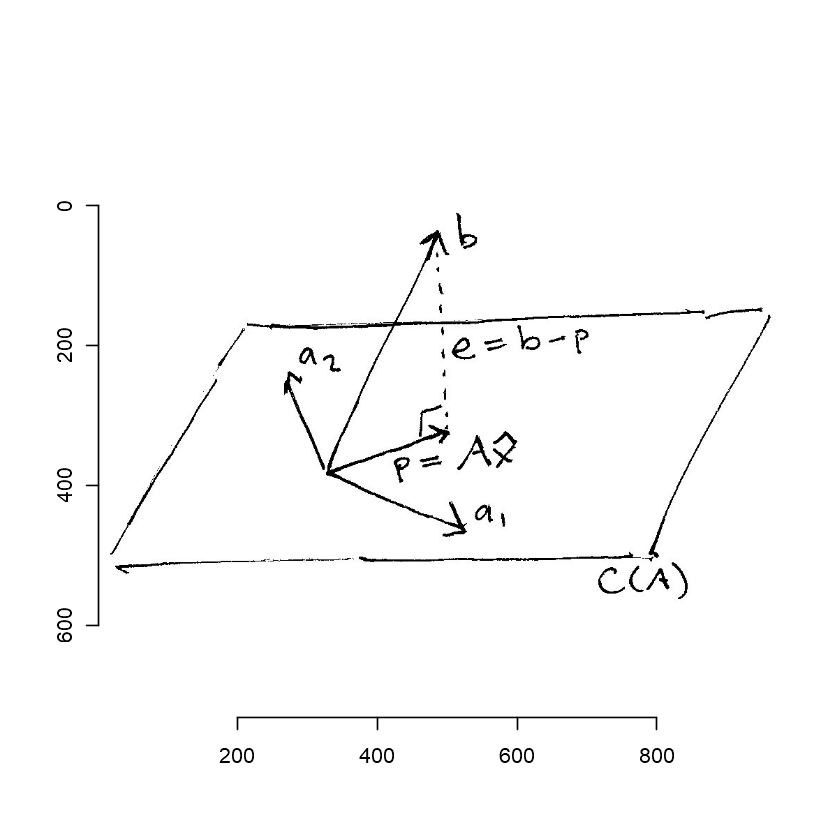

In [3]:
setwd('C:/Users/bki19/desktop/Dimensionality_Reduction')
library(imager)
im<-load.image("./projection.jpg")
plot(im)

출처: https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwiQ7oqdjsDiAhVSGKYKHaL1CK8QjRx6BAgBEAU&url=https%3A%2F%2Fmedium.com%2F%40andrew.chamberlain%2Fthe-linear-algebra-view-of-least-squares-regression-f67044b7f39b&psig=AOvVaw0BzTnzhFsTqwbc2-FYdrDX&ust=1559197696770872

모델: $y=X\beta$<br>
Projection matrix:$\hat{y}=X\hat{\beta}=p(y|c(X) )=p(y|X )$<br>
Error:$e=y-\hat{y}$<br>

Projection Matrix<br>
$\hat{y}=X\hat{\beta}=p(y|c(X) )=p(y|X )$<br>
$=X(X^{T}X)^{-1}X^{T}y$<br>
$=Hy$<br>
=> H는 Orthogonal projection Matrix onto $C(X)$, y에 hat 모자를 씌우기 때문에 hat matrix라고 불리움
$\hat{y}$는 $C(X)$에서 $y$에 가장 가까운 점 => LSE랑 같은 의미<br>


$X^{T}e =0$<br>
$X^{T}(y-\hat{y}) =0$<br>
$X^{T}y-X^{T}\hat{y} =0$<br>
$X^{T}y-X^{T}X\hat{\beta} =0$<br>
$X^{T}y=X^{T}X\hat{\beta}$<br>
$\hat{\beta}=(X^{T}X)^{-1}X^{T}y$<br>


$rank(X^{T}X)=rank(X)$<br>
$(X^{T}X)$가 nonsingular <=> $X$가 full column rank

# 4. Eigenvalue and SVD

<b>Eigenvalue and eigenvector</b>

def 2.25) Eigenvalue<br>
$nxn$ matrix $A$에 대해 scalar $\lambda$는 다음을 만족하면 $A$의 eigen value이다<br>
$det(A-\lambda I_{n})=0$<br>
=> 따라서 $A-\lambda I_{n}$는 singular이기 때문에 $rank(A-\lambda I_{n})<n$<br>
=> $A-\lambda I_{n}$의 columns는 linearly related

Eigen Vector<br>
$(A-\lambda I_{n})v=0$이게 하는 0이 아닌 벡터 $v$


Theorem 2.25) A와 eigenvector의 관계 <br>
$A$가 square matrix, $\lambda_{1},...,\lambda_{k}$가 $A$의 서로 다른 eigen value, $v_{1},...,v_{k}$가 대응되는 eigenvector면 eigenvector는 서로 linearly independent<br>
$A$가 symmetric이면 $v_{1},...,v_{k}$는 서로 orthogonal

Theorem 2.25) eigenvalue의 특징 <br>
$A$가 square matrix, $\lambda_{1},...,\lambda_{n}$가 $A$의 eigen value면 다음이 성립<br>
1) $tr(A)=\sum_{i=1}^{n} \lambda_{i}$<br>
2) $det(A)=\prod_{i=1}^{n} \lambda_{i}$

<b>Spectral Decomposition and SVD</b>

Theorem 2.27 Spectral Decomposition<br>
$nxn$ matrix A가 symmetric이면 $A=P\Lambda P^{T}$가 되게 하는 $P$가 존재<br>
여기서 $\Lambda=Diag(\lambda_{1},...,\lambda_{n})$<br>
$P$의 columns는 $A$의 eigenvalue에 대응되는 orthonormal eigenvector

Theorem 2.28 Singular Value Decomposition<br>
$mxn(m \leq n)$ matrix A가 $rank(A)=r$이면 $A=P[D:0] Q^{T}$가 되게 하는 $P,Q$가 존재<br>
여기서 $D=Diag(\lambda_{1},...,\lambda_{m})$이면서 nonnegative element은 A의 singular value라고 함<br>
$0$는 $(mx(n-m))$<br>
singular value는 $A^{T}A$나 $AA^{T}$의 square root

# 5. Positivie Definite

Quadratic Form<br>
$A$가 symmetric matrix이고 $x$가 vector 일 때 <br>
$x^{T}Ax= \sum_{i} a_{ii}y_{i}^{2}+\sum _{i \neq j} a_{ij}x_{i}x_{j}$를 quadratic form이라고 함<br>
여기서 $a_{ii}$는 $A$의 diagonal element, $a_{ij}$는 off-diagonal element

Definition 2.29) Positive Definite and Positive Semi-Definite<br>
$A$가 $(nxn)$ symmetric matrix이고 모든 $x \neq 0$에 대해 $x^{T}Ax>0$이면 positive definite이라고 함<br>
$x^{T}Ax \geq 0$이면 positive semi definite이라고 함

<b>positive definite 성질들</b>

1.<br>
$A$ 가 p.d.면 모든 $a_{ii}>0$<br>
$A$ 가 p.s.d.면 모든 $a_{ii}\geq 0$<br>

2.<br>
$M$이 nonsigular matrix일 때
1) $A$가 p.d.이면 $M^{T}AM$도 p.d.
2) $A$가 p.s.d.이면 $M^{T}AM$도 p.s.d.

3.<br>
$A$가 $(pxp)$인 p.d.이고 $B$가 $(kxp)$면서 $r\leq p$이면<br>
$BAB^{T}$도 p.d.

4.<br>
$A$가 $(pxp)$인 p.d.이고 $B$가 $(kxp)$일때 $k>p$이거나 $rank (B)<min(k,p)$이면<br>
$BAB^{T}$은 p.s.d.

5.<br>
symmetric matrix A는 p.d. iff $A=M^{T}M$이 되게 하는 nonsingular matrix $M$이 존재할 때

6.<br>
p.d. matrix는 non sigular

7.<br>
B가 $(nxp)$ 행렬일 때<br>
a. rank(B)=p이면 $B^{T}B$는 p.d.<br>
b. rank(B)<p이면 $B^{T}B$는 p.s.d.

8.<br>
만약 $A$가 p.d.면 $A^{-1}$도 p.d.